In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurances = pd.read_csv('Data/insurances.csv')

In [3]:
insurances.head()

,wiek,plec,bmi,dzieci,palacz,region,kwota
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


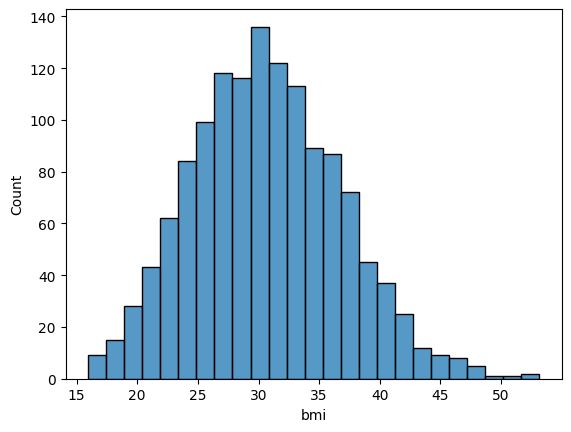

In [4]:
sns.histplot(data=insurances, x='bmi')
plt.show()

In [5]:
insurances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wiek    1338 non-null   int64  
 1   plec    1338 non-null   object 
 2   bmi     1338 non-null   float64
 3   dzieci  1338 non-null   int64  
 4   palacz  1338 non-null   object 
 5   region  1338 non-null   object 
 6   kwota   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurances.describe(include='all')

,wiek,plec,bmi,dzieci,palacz,region,kwota
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
insurances.shape

(1338, 7)

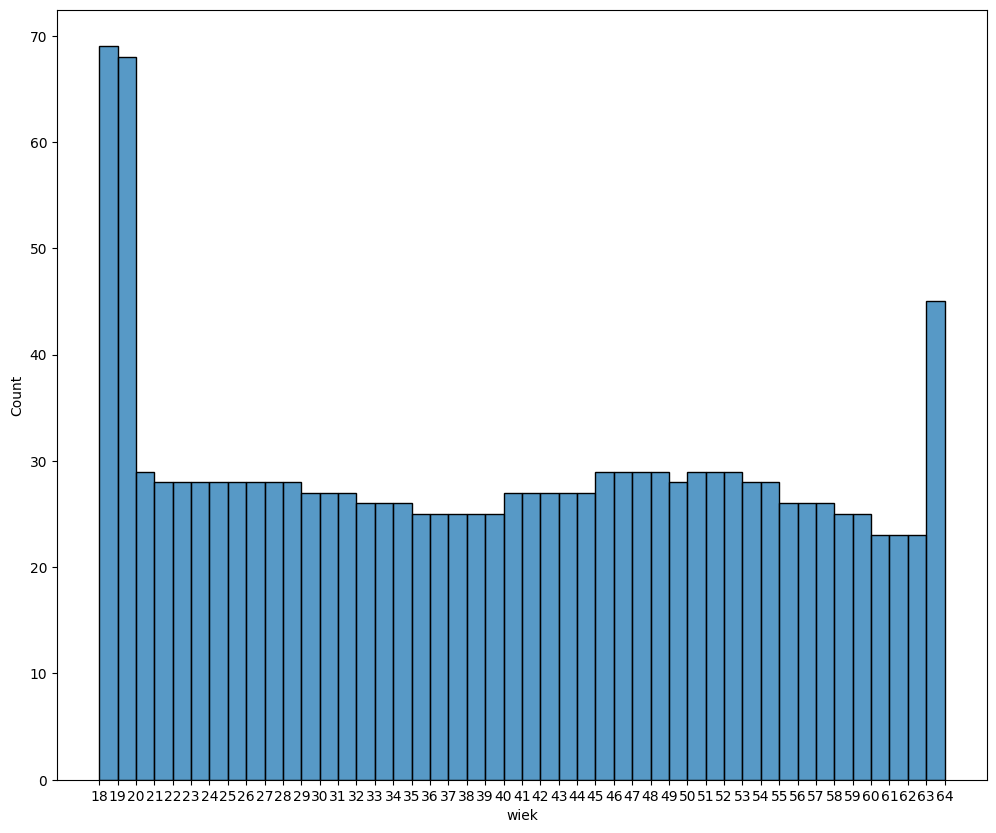

In [8]:
plt.figure(figsize=(12,10))
sns.histplot(data = insurances, x='wiek', binwidth=1)
plt.xticks(np.arange(insurances['wiek'].min(), insurances['wiek'].max()+1, 1))
plt.show()

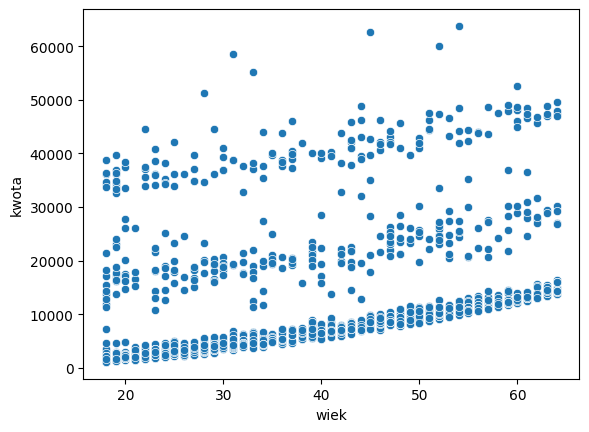

In [9]:
sns.scatterplot(data=insurances, x='wiek', y='kwota')
plt.show()


In [10]:
insurances['wiek'].corr(insurances['kwota'])

0.29900819333064776

In [11]:
insurances = pd.get_dummies(data=insurances, columns=['plec', 'region'], prefix='czy')
boolean = {'yes': 1, 'no': 0}
insurances['palacz'] = insurances['palacz'].map(boolean)

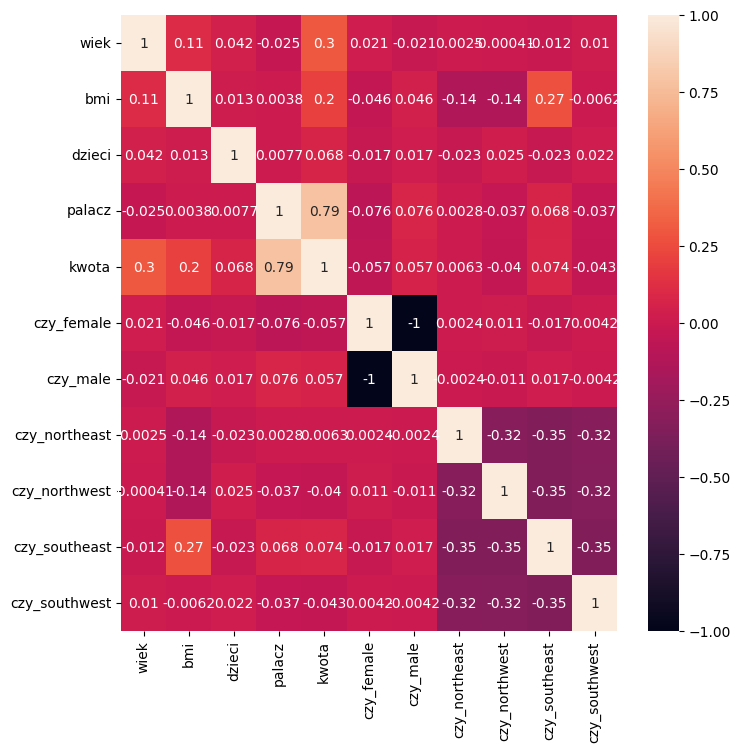

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(insurances.corr(), annot=True)
plt.show()

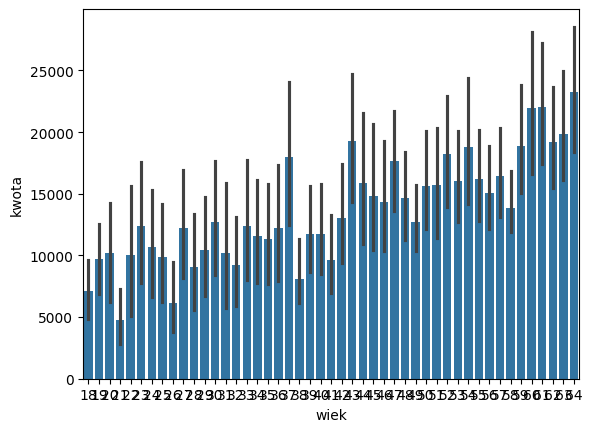

In [13]:
sns.barplot(data=insurances, x='wiek', y='kwota')
plt.show()

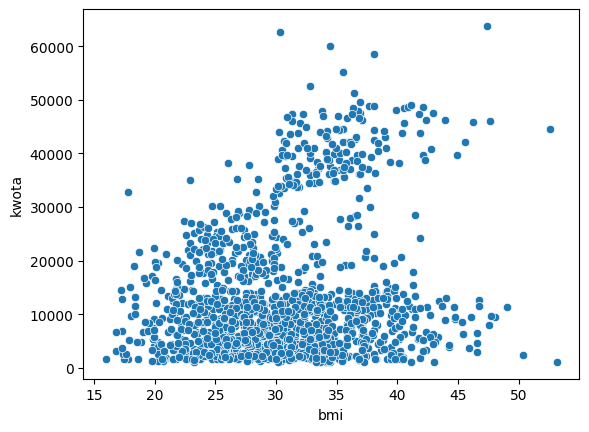

In [14]:
sns.scatterplot(data=insurances, x='bmi', y='kwota')
plt.show()

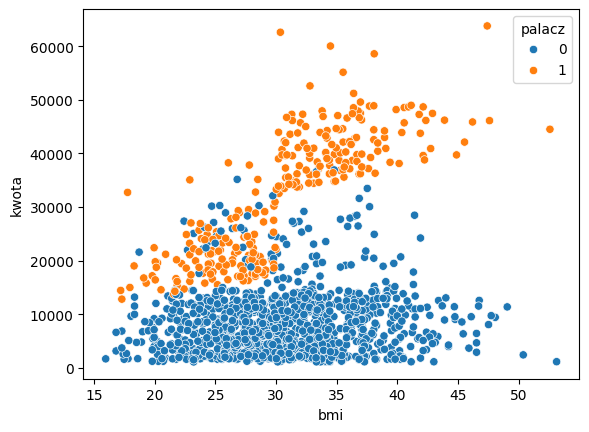

In [15]:
sns.scatterplot(data=insurances, x='bmi', y='kwota', hue='palacz')
plt.show()

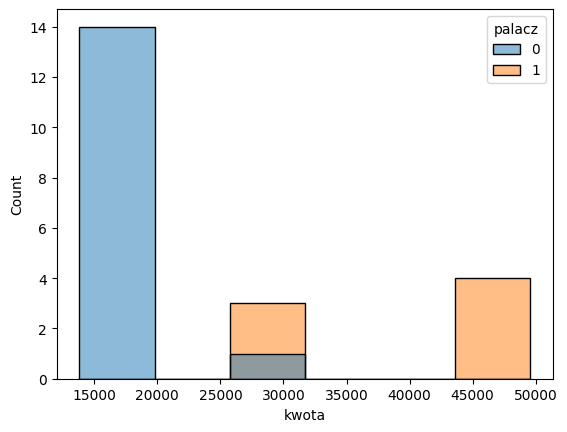

In [16]:
sns.histplot(data=insurances[insurances['wiek']==64], x='kwota', hue='palacz')
plt.show()

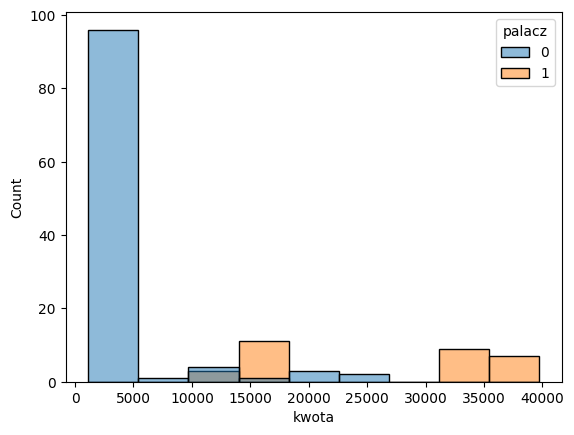

In [17]:
sns.histplot(data=insurances[insurances['wiek'].isin([18,19])], x='kwota', hue='palacz')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [19]:
X = insurances.drop('kwota', axis=1)
y = insurances['kwota']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.fit_transform(X_test)

In [22]:
def summary(model):
    y_pred = model.predict(X_test_prepared)
    R2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    print('R2: '+str(R2))
    print('MSE: '+str(MSE))
    print('MAE: '+str(MAE))

In [23]:
lr = LinearRegression()
lr.fit(X_train_prepared, y_train)
summary(lr)


R2: -5.6439483793240053e+23
MSE: 7.589087863451901e+31
MAE: 7490135952592494.0


In [24]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
lasso = Lasso()
ridge = Ridge()

In [25]:
lasso.fit(X_train_prepared, y_train)
summary(lasso)

R2: 0.7159219273882064
MSE: 38198319.832776174
MAE: 4357.274108902728


In [26]:
ridge.fit(X_train_prepared, y_train)
summary(lasso)

R2: 0.7159219273882064
MSE: 38198319.832776174
MAE: 4357.274108902728
